In [416]:
# shhhh, silence in the library.
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import wrangle


1. Clustering with the Iris Dataset


In [417]:
url = wrangle.get_url("iris_db")

In [418]:
sql = '''SELECT * from species
JOIN measurements
USING(species_id);'''

In [419]:
df = pd.read_sql(sql , url)

In [420]:
df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [421]:
df.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   species_name    150 non-null    object 
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [423]:
df = df.drop(columns=["species_id", "measurement_id"])

In [424]:
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [425]:
df = df.rename(columns={"species_name" : "species"})

> All clean.

In [426]:
# scaling for distance reasons!
df_scaled = wrangle.scale(df, columns_for_scaling=["petal_width", "sepal_width", "petal_length", "sepal_length"])

In [427]:
train, validate, test = wrangle.train_split(df)
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [428]:
train_s, validate_s, test_s = wrangle.train_split(df_scaled)
train_s.shape, validate_s.shape, test_s.shape

((84, 5), (36, 5), (30, 5))


Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson. (Petal_Length/Sepal_Length)
- Visualize the results of your clustering.


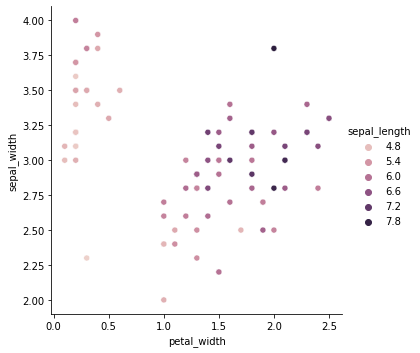

In [429]:
sns.relplot(data = train, x = "petal_width", y= "sepal_width", hue = "sepal_length")

In [430]:
for thing1, thing2 in df.groupby('species'):
    print(thing1)
    print(thing2)

setosa
   species  sepal_length  sepal_width  petal_length  petal_width
0   setosa           5.1          3.5           1.4          0.2
1   setosa           4.9          3.0           1.4          0.2
2   setosa           4.7          3.2           1.3          0.2
3   setosa           4.6          3.1           1.5          0.2
4   setosa           5.0          3.6           1.4          0.2
5   setosa           5.4          3.9           1.7          0.4
6   setosa           4.6          3.4           1.4          0.3
7   setosa           5.0          3.4           1.5          0.2
8   setosa           4.4          2.9           1.4          0.2
9   setosa           4.9          3.1           1.5          0.1
10  setosa           5.4          3.7           1.5          0.2
11  setosa           4.8          3.4           1.6          0.2
12  setosa           4.8          3.0           1.4          0.1
13  setosa           4.3          3.0           1.1          0.1
14  setosa        

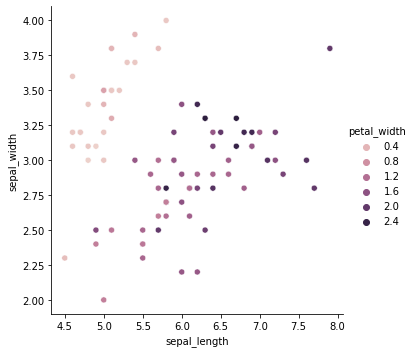

In [431]:
sns.relplot(data=train, x='sepal_length', y='sepal_width', hue = 'petal_width')

> Sepal Alone makes this very difficult.

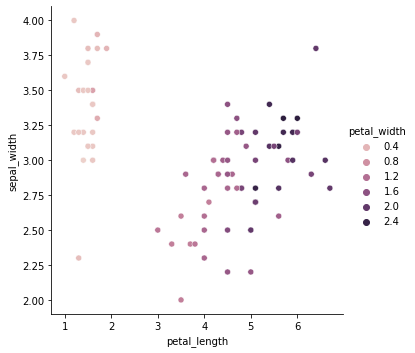

In [432]:
sns.relplot(data=train, x='petal_length', y='sepal_width', hue = 'petal_width')

> This is a little more distinct, but I was hoping for something where the hue wouldn't be the deciding factor. (RE: species as hue)

> Decided to prevent target leak, but not using the target to decide...

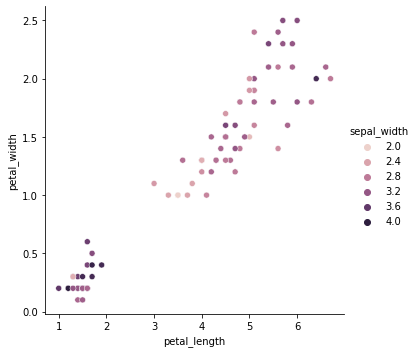

In [433]:
sns.relplot(data=train, x= 'petal_length', y= 'petal_width', hue = 'sepal_width')

##### Of the graphs above, one stood out as my favourite:

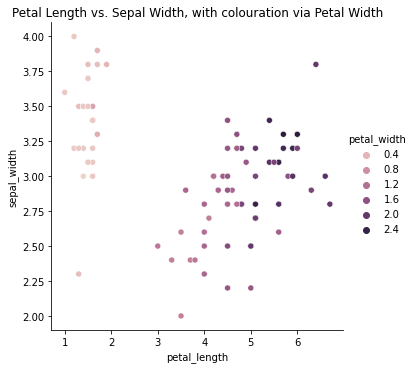

In [434]:
sns.relplot(data=train, x='petal_length', y='sepal_width', hue = 'petal_width')
plt.title("Petal Length vs. Sepal Width, with colouration via Petal Width")
plt.show()

> There is a much more pronounced difference between the very light, light, and dark hues than vs other graphs. This one shows more adptly that instead of just two clusters, it's most likely three, with two being very similar then the third being signifigantly smaller.

In [435]:
# Splitting so my target minds its own business. function turns y into a dataframe again too!
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.df_split(train, validate, test, target='species')
X_train.shape, y_train.shape

((84, 4), (84, 1))

In [436]:
X_train_s, y_train_s, X_validate_s, y_validate_s, X_test_s, y_test_s = wrangle.df_split(train_s, validate_s, test_s, target='species')
X_train_s.shape, y_train_s.shape

((84, 4), (84, 1))

### Making our own Clusters!

In [437]:
# shoving the cluster onto train, so I can see it better with the actual results
X = train_s[["petal_length", 'sepal_width']]
Y = df[['petal_length', 'sepal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
train["cluster"] = kmeans.predict(X)
y_train['cluster'] = kmeans.predict(X)
df['cluster'] = kmeans.predict(Y)

In [438]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,cluster
56,versicolor,6.3,3.3,4.7,1.6,0
40,setosa,5.0,3.5,1.3,0.3,1
70,versicolor,5.9,3.2,4.8,1.8,0
23,setosa,5.1,3.3,1.7,0.5,1
139,virginica,6.9,3.1,5.4,2.1,0


In [439]:
train.cluster.value_counts(), train.species.value_counts()

(2    34
 1    26
 0    24
 Name: cluster, dtype: int64,
 versicolor    31
 virginica     27
 setosa        26
 Name: species, dtype: int64)

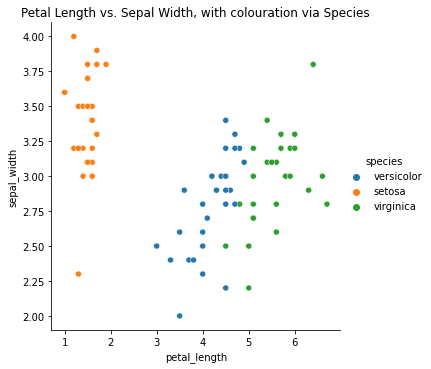

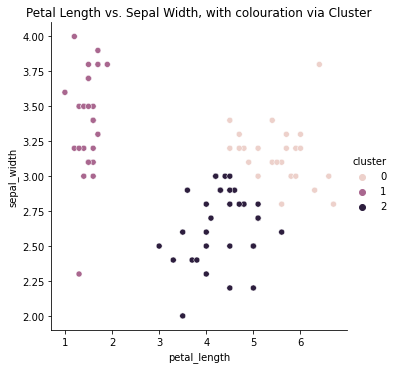

In [440]:
sns.relplot(data=train, x='petal_length', y='sepal_width', hue = 'species')
plt.title("Petal Length vs. Sepal Width, with colouration via Species")

sns.relplot(data=train, x='petal_length', y='sepal_width', hue = 'cluster')
plt.title("Petal Length vs. Sepal Width, with colouration via Cluster")
plt.show()

----
# Another way to plot:

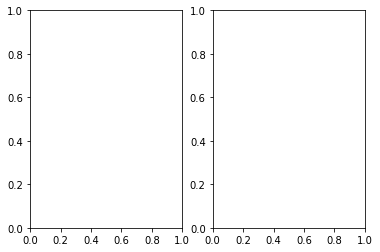

In [441]:
fig, axs = plt.subplots(1, 2)

[Text(0.5, 1.0, 'K-Means Clusters')]

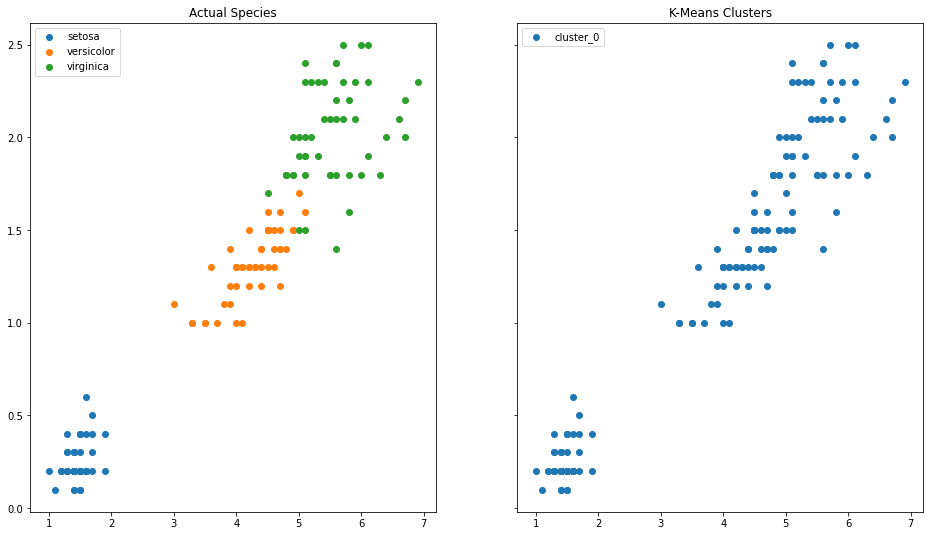

In [442]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].petal_length, df[df.cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

> Colour is missing, I wonder why

This was an accident, but I could see it having applications

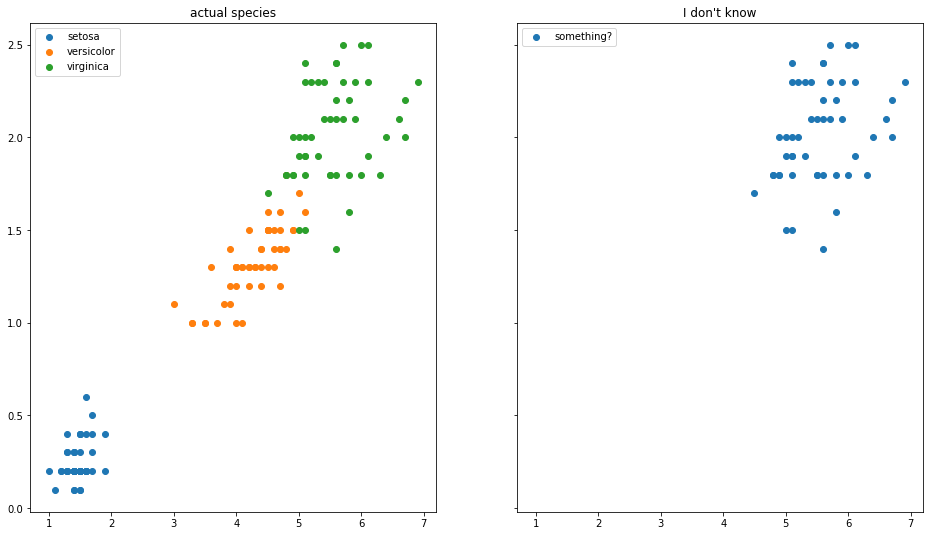

In [443]:
fig, axs = plt.subplots(1, 2, figsize=(16,9), sharex=True, sharey=True)
for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label = species)

axs[0].legend()
axs[0].set(title="actual species")

for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(subset.petal_length, subset.petal_width, label= 'something?')

axs[1].legend()
axs[1].set(title="I don't know")

plt.show()

----

- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.


In [444]:
kmeans, kmeans.inertia_

(KMeans(n_clusters=3), 1.7877011985345086)

In [445]:
{k : KMeans(k).fit(X_train_s).inertia_ for k in range(2,10)}

{2: 7.019358226711742,
 3: 4.066699223802174,
 4: 3.1373083373715485,
 5: 2.705293796461083,
 6: 2.246300973177174,
 7: 1.9392967545287962,
 8: 1.7362765349149312,
 9: 1.5444875770678304}

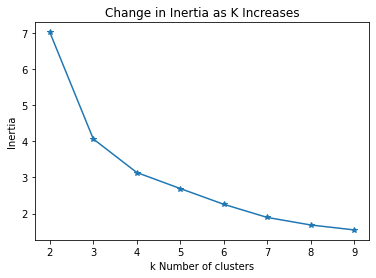

In [446]:
pd.Series(
    {k: KMeans(k).fit(X_train_s).inertia_
    for k in range(2,10)}).plot(marker='*')
plt.ylabel('Inertia')
plt.xlabel("k Number of clusters")
plt.title("Change in Inertia as K Increases")
plt.show()

> The Degree of Change tappers right around 3 clusters. Lucky Me.

##### 3 Features this time:

In [447]:
X = train_s[["petal_length", "petal_width", 'sepal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
train["three_cluster"] = kmeans.predict(X)
y_train['three_cluster'] = kmeans.predict(X)

In [448]:
train.three_cluster.value_counts(), train.species.value_counts()

(2    31
 0    27
 1    26
 Name: three_cluster, dtype: int64,
 versicolor    31
 virginica     27
 setosa        26
 Name: species, dtype: int64)

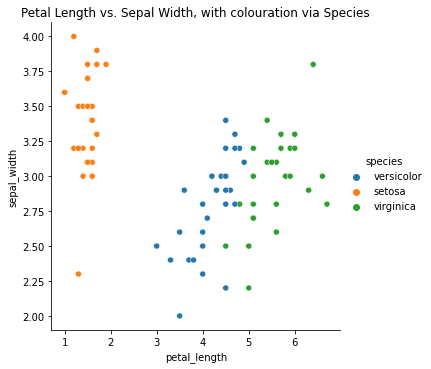

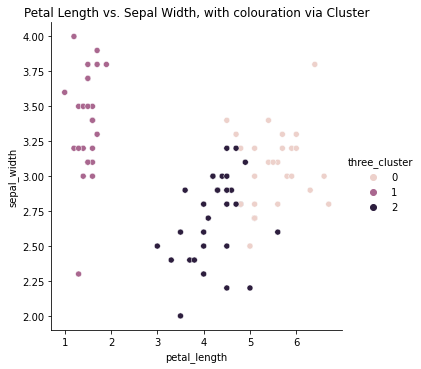

In [449]:
sns.relplot(data=train, x='petal_length', y='sepal_width', hue = 'species')
plt.title("Petal Length vs. Sepal Width, with colouration via Species")

sns.relplot(data=train, x='petal_length', y='sepal_width', hue = 'three_cluster')
plt.title("Petal Length vs. Sepal Width, with colouration via Cluster")
plt.show()

> Value counts show perfect seperation, but viewing the charts, it can be seen that 3 of virginica and versicolor were swapped, that's still not all that bad though.

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


****We did this for in class lesson****

In [450]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/cc276eea59e8295204d1f581c8da509f/raw/2388559aef7a0700eb31e7604351364b16e99653/mall_customers.csv', index_col="customer_id")

df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [451]:
df.groupby('gender').agg(['min','max', 'median', 'std', 'mean']).T

gender                     Female        Male
age            min      18.000000   18.000000
               max      68.000000   70.000000
               median   35.000000   37.000000
               std      12.644095   15.514812
               mean     38.098214   39.806818
annual_income  min      16.000000   15.000000
               max     126.000000  137.000000
               median   60.000000   62.500000
               std      26.011952   26.638373
               mean     59.250000   62.227273
spending_score min       5.000000    1.000000
               max      99.000000   97.000000
               median   50.000000   50.000000
               std      24.114950   27.896770
               mean     51.526786   48.511364

In [452]:
# There is no target variable so...
train = df.copy()
train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [453]:
train_scaled = wrangle.scale(train, ["age", "annual_income", "spending_score"])
train_scaled.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,0.019231,0.000000,0.387755
2,Male,0.057692,0.000000,0.816327
3,Female,0.038462,0.008197,0.051020
4,Female,0.096154,0.008197,0.775510
5,Female,0.250000,0.016393,0.397959


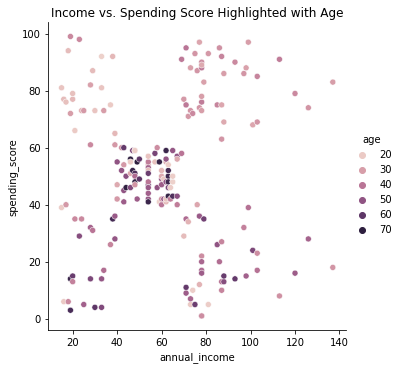

In [454]:
sns.relplot(data=train, 
            x="annual_income",
            y="spending_score", 
            hue = "age").set(
                title="Income vs. Spending Score Highlighted with Age")
plt.show()

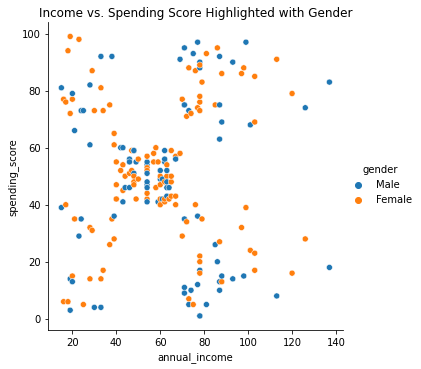

In [455]:
sns.relplot(data=train, 
            x="annual_income",
            y="spending_score", 
            hue = "gender").set(
                title="Income vs. Spending Score Highlighted with Gender")
plt.show()

In [456]:
X = train_scaled[["spending_score", "annual_income"]]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train["cluster"] = kmeans.predict(X)

In [457]:
train.cluster.value_counts()

4    81
0    39
2    35
1    23
3    22
Name: cluster, dtype: int64

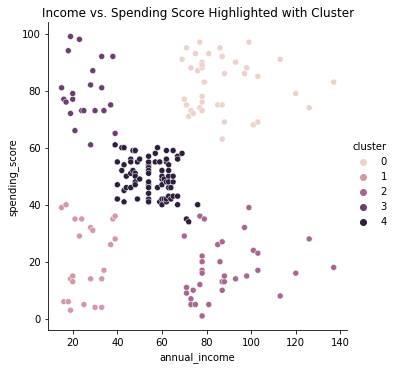

In [458]:
sns.relplot(data=train, 
            x="annual_income",
            y="spending_score", 
            hue = "cluster").set(
                title="Income vs. Spending Score Highlighted with Cluster")
plt.show()

> Wow, without age it actually makes some very nice and clean clusters!

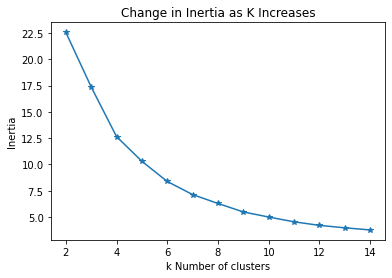

In [459]:
# Elbow it!
# I just realised they probably mean elbow as in the shape of the graph, and not as in strong arming their data where they want.
X = train_scaled[["spending_score", "annual_income", "age"]]
pd.Series(
    {k: KMeans(k).fit(X).inertia_
    for k in range(2,15)}).plot(marker='*')
plt.ylabel('Inertia')
plt.xlabel("k Number of clusters")
plt.title("Change in Inertia as K Increases")
plt.show()

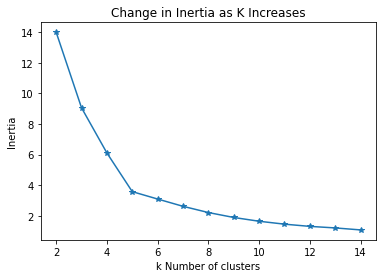

In [460]:
# Elbow is somewhere around four or five
# Let's see if we drop age
X = train_scaled[["spending_score", "annual_income"]]
pd.Series(
    {k: KMeans(k).fit(X).inertia_
    for k in range(2,15)}).plot(marker='*')
plt.ylabel('Inertia')
plt.xlabel("k Number of clusters")
plt.title("Change in Inertia as K Increases")
plt.show()

> Wooo, without age making it consider 4, I see why we have that really nice cluster into five groups earlier.


3. How does scaling impact the results of clustering?
Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.


In [461]:
# We'll use Mall since Iris is all in the same measurement size (cm)
train.head()
train = train.drop(columns="cluster")
train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [462]:
X = train[["spending_score", "annual_income", "age"]]
Y = train_scaled[["spending_score", "annual_income", "age"]]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train["cluster"] = kmeans.predict(X)

kmeans_s = KMeans(n_clusters=5)
kmeans_s.fit(Y)
train["scaled_cluster"] = kmeans_s.predict(Y)

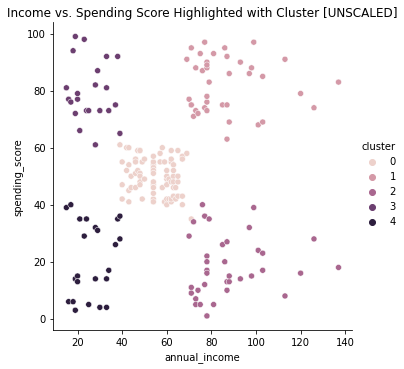

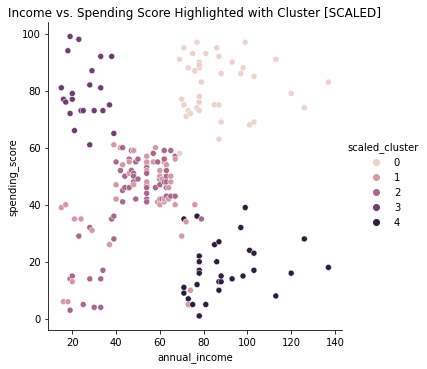

In [463]:
sns.relplot(data=train, 
            x="annual_income",
            y="spending_score", 
            hue = "cluster").set(
                title="Income vs. Spending Score Highlighted with Cluster [UNSCALED]")

sns.relplot(data=train, 
            x="annual_income",
            y="spending_score", 
            hue = "scaled_cluster").set(
                title="Income vs. Spending Score Highlighted with Cluster [SCALED]")
plt.show()

> Okay, so I included Age because just Spending Score and Income didn't produce a difference scaled vs unscaled.

**BUT** you can see how much scaled has an affect on if age even matters vs unscaled. You start to see the clear chunks where age affects the clustering, and you get the overlapping middle and bottom left clusters to show how much age affects again.


**Bonus**
- Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- Visualize the data and guess the number and shape of the clusters.
- Implement the KMeans algorithm on unscaled data and visualize the clusters.
- Repeat the step above but with scaled data.
- Write down the takeaways from this exercise.

### Takeaways: